# Sequence expression from the Malva Index

## 1. Login and Connecting to the Malva Index

From the previous notebook `00_setup_malva_client.ipynb`, paste here the `API_TOKEN` you generated from your user profile in [https://malva.mdc-berlin.de](https://malva.mdc-berlin.de)

In [ ]:
API_TOKEN = "" # place your token here

Then, you are ready to use the `malva_client` Python package to access the Malva Index programatically.

In [ ]:
import dnaio
from malva_client import MalvaClient
from malva_client.tools import mask_sequence

client = MalvaClient("https://malva.mdc-berlin.net", API_TOKEN)

You might also want to install some additional utilities for downstream analysis

In [ ]:
!pip install scanpy

## 2. Querying the Malva Index

The true power of Malva lies in enabling sequence searches across our harmonized index of >7,000 single-cell and spatial transcriptomics samples. This unprecedented scale enables:

- **Cross-study comparisons**: Identify expression patterns across diverse experimental conditions
- **Rare event detection**: Find low-frequency sequences that would be missed in individual studies
- **Metadata-driven analysis**: Leverage rich sample annotations for targeted queries
- **Real-time quantification**: Instantaneous results without reprocessing raw data

Each query returns not just expression levels, but complete provenance information linking back to the original cells and samples for downstream analysis.

### 2.1 Querying gene(s)

As before, we can perform querying of specific genes across these data by providing specific gene IDs. Check your favourite gene here.

In [ ]:
results = client.search("FOXP3")
print(results)

INFO:malva_client.client:Search completed with job ID: 860660b3-a775-4125-9e18-b9575511536b


🔬 Malva Search Results
📊 Total cells: 7,576
🧬 Genes/sequences: 1
🧪 Samples: 2634
🔬 Cell types: 192
📈 Expression range: 0.000 - 255.041
📊 Mean expression: 2.181

ℹ️  Basic expression data only
💡 Run .enrich_with_metadata() to add sample metadata for filtering by:
   • Organ, disease, species
   • Study, laboratory, protocol
   • Age, sex, development stage

🔍 Available methods:
   • .filter_by(organ='brain', disease='normal')
   • .aggregate_by('cell_type')
   • .plot_expression_by('organ')
   • .available_filter_fields()


The `plot_expression_summary()` function provides a bird's-eye view of your query results, aggregating expression across major cell types in our harmonized atlas. This immediate visualization helps you:

- Assess the biological relevance of your query
- Identify unexpected expression patterns
- Guide more targeted follow-up analyses
- Validate known expression profiles

In [ ]:
fig = results.plot_expression_summary("cell_type")

Just for fun, we can query another gene. This time, *DLX2*, a (inhibitory) neuron-specific TF.

In [ ]:
fig = results.plot_expression_summary("cell_type")

The results overview shows you a quick summary of what Malva could find from your query. This provides an overview of the cells that express this phenotype, aggregated per cell type. One can retrieve the relevant metadata to do more sophisticated filtering, e.g., by tissue, sample...

In [ ]:
results.enrich_with_metadata()

#### 2.1.1 Basic results handling operations

Since the `results` output is backed by a `DataFrame`, we can perform any aggregation and filtering operations very efficiently, across any layers of metadata that are available.

In [5]:
results.aggregate_by("cell_type", agg_func="median").head(20)

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


,cell_type,median_norm_expr,n_observations,total_cells,n_samples
154,pre_B_cell,30.931807,1,63,1
8,CD4_effector_memory_T_cell,5.136268,3,65,3
4,CD4_Th17_cell,4.993114,6,114,6
6,CD4_Th2_cell,4.146733,81,791,81
15,CD8_positive_thymocyte,3.818384,2,48,2
65,double_negative_thymocyte,3.516803,2,54,2
3,CD4_Tfh_cell,3.006743,2,19,2
7,CD4_central_memory_T_cell,2.689708,1,11,1
151,plasmacytoid_dendritic_cell,2.293230,26,162,26
103,intestinal_stem_cell,2.279307,1,5,1


In [ ]:
# filtering by specific metadata
filter_data = results.filter_by(disease='normal', organ='brain')
avg_by_celltype = filter_data.aggregate_by('cell_type')

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = self._df.groupby(resolved_group_cols)


In [7]:
avg_by_celltype

,cell_type,mean_norm_expr,n_observations,total_cells,n_samples
124,myeloid_cell,36.373232,1,21,1
154,pre_B_cell,30.931807,1,63,1
129,naive_CD4_T_cell,26.687121,6,320,6
8,CD4_effector_memory_T_cell,19.831834,1,60,1
161,regulatory_T_cell,18.947496,19,732,19
...,...,...,...,...,...
126,myoblast,NaN,0,0,0
164,retinal_pigment_epithelial_cell,NaN,0,0,0
177,theca_cell,NaN,0,0,0
186,tumor_associated_macrophage,NaN,0,0,0


### 2.2 Running complex queries

Malva's advanced query processing can interpret complex biological concepts, including:

- **Gene signatures**: Multi-gene patterns associated with biological processes
- **Pathway descriptions**: Natural language descriptions of cellular functions
- **Literature-derived signatures**: Direct copy-paste from published gene lists
- **Custom biological concepts**: User-defined patterns of interest

This capability bridges the gap between biological knowledge and computational analysis, making complex queries accessible to researchers without extensive bioinformatics expertise.

In [ ]:
sentence = "find cells with hallmarks of neurodegeneration"
results = client.search(sentence)
print(results)

### 3.3 Looking for sequences

One of Malva's most powerful applications is the unbiased detection of sequences absent from standard references:

- Viral sequences: Detect active infections, latent viral transcripts, or contamination
- Bacterial transcripts: Identify microbiome signatures in tissue samples
- Circular RNAs: Find back-splicing events missed by linear mapping
- Novel junctions: Discover rare splicing events or fusion transcripts
- Endogenous retroviruses: Quantify normally silenced repetitive elements

**Note: Sequence Masking Strategy**
The optional `mask_sequence()` function removes low-complexity regions that can cause:

- Over-quantification of highly repetitive k-mers
- False positive matches due to simple sequence repeats
- Reduced specificity in sequence identification

Experiment with masked vs. unmasked queries to optimize sensitivity vs. specificity for your specific use case.

In [ ]:
with dnaio.open("rna.fa") as f_in:
    for s in f_in:
        seq = s.sequence
        break

In [ ]:
# seq = mask_sequence(seq) # optional, will remove low complexity sequences
results = client.search(seq)
print(results)

INFO:malva_client.client:Search completed with job ID: d94127a1-37ee-48b3-8933-4250ce7dfbdb


✓ Enriched with metadata for 219 samples
🔬 Malva Search Results
📊 Total cells: 1,317
🧬 Genes/sequences: 1
🧪 Samples: 219
🔬 Cell types: 150
📈 Expression range: 0.002 - 101.708
📊 Mean expression: 0.266

✅ Enriched with sample metadata
🏷️  Available metadata: organ, disease, species, study

🔍 Available methods:
   • .filter_by(organ='brain', disease='normal')
   • .aggregate_by('cell_type')
   • .plot_expression_by('organ')
   • .available_filter_fields()


In [ ]:
results.enrich_with_metadata()

/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:358: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = (self._df.groupby(group_by)['norm_expr']
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:394: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_counts = plot_data.groupby(group_by)['sample_id'].nunique().reindex(top_categories)
/local/malva/envs/dleonpe/miniforge3/envs/malva/lib/python3.11/site-packages/malva_client/models.py:409: FutureWarning: The default of observed=False is deprecated a


📊 Summary for Cell Type:
--------------------------------------------------
trophoblast_cell: 1 samples, 98 cells, μ=17.493
Unknown: 127 samples, 2,622 cells, μ=1.082
cytotrophoblast: 1 samples, 13 cells, μ=0.992
basal_epithelial_cell: 30 samples, 309 cells, μ=0.626
extravillous_trophoblast: 1 samples, 8 cells, μ=0.616
muscle_cell: 1 samples, 20 cells, μ=0.451
cardiomyocyte: 5 samples, 181 cells, μ=0.434
colonocyte: 7 samples, 68 cells, μ=0.430
amacrine_cell: 3 samples, 95 cells, μ=0.420
inhibitory_neuron: 7 samples, 284 cells, μ=0.420


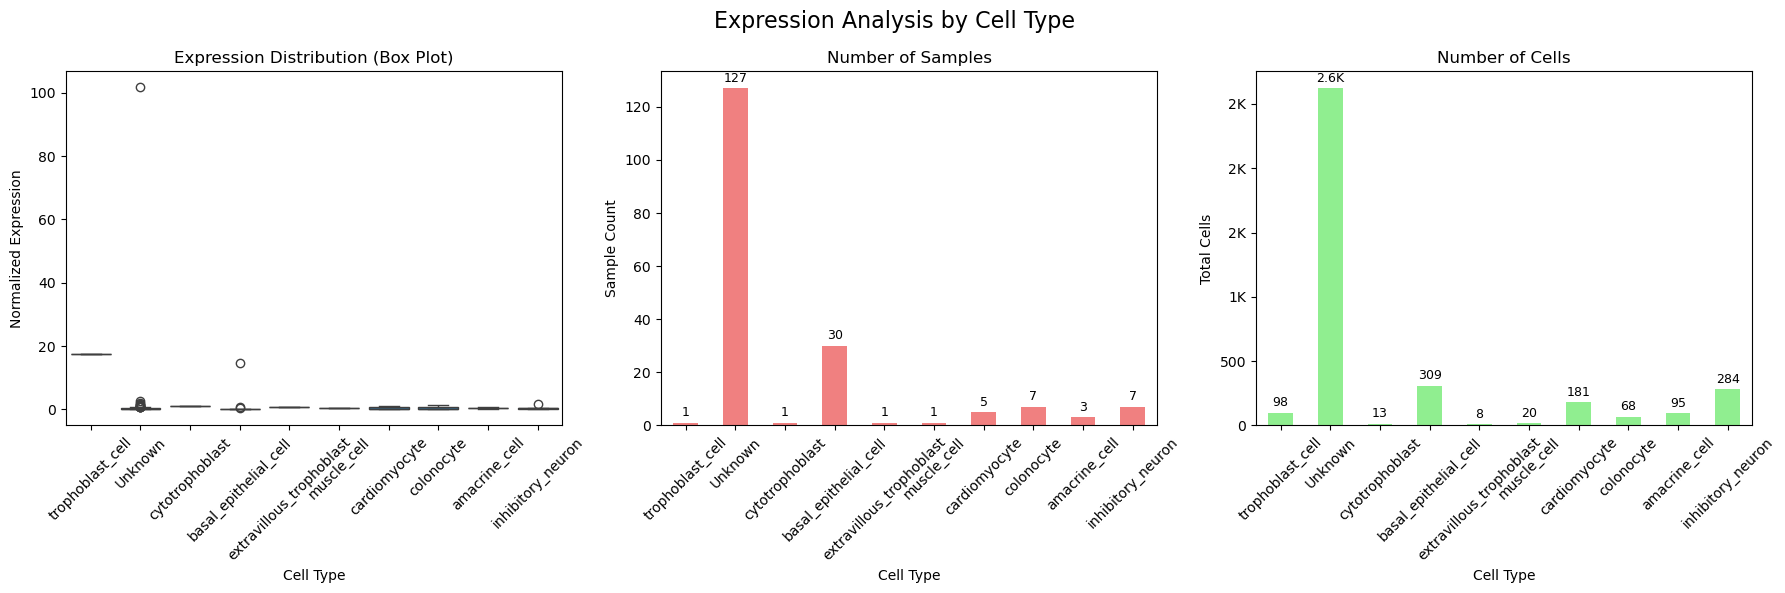

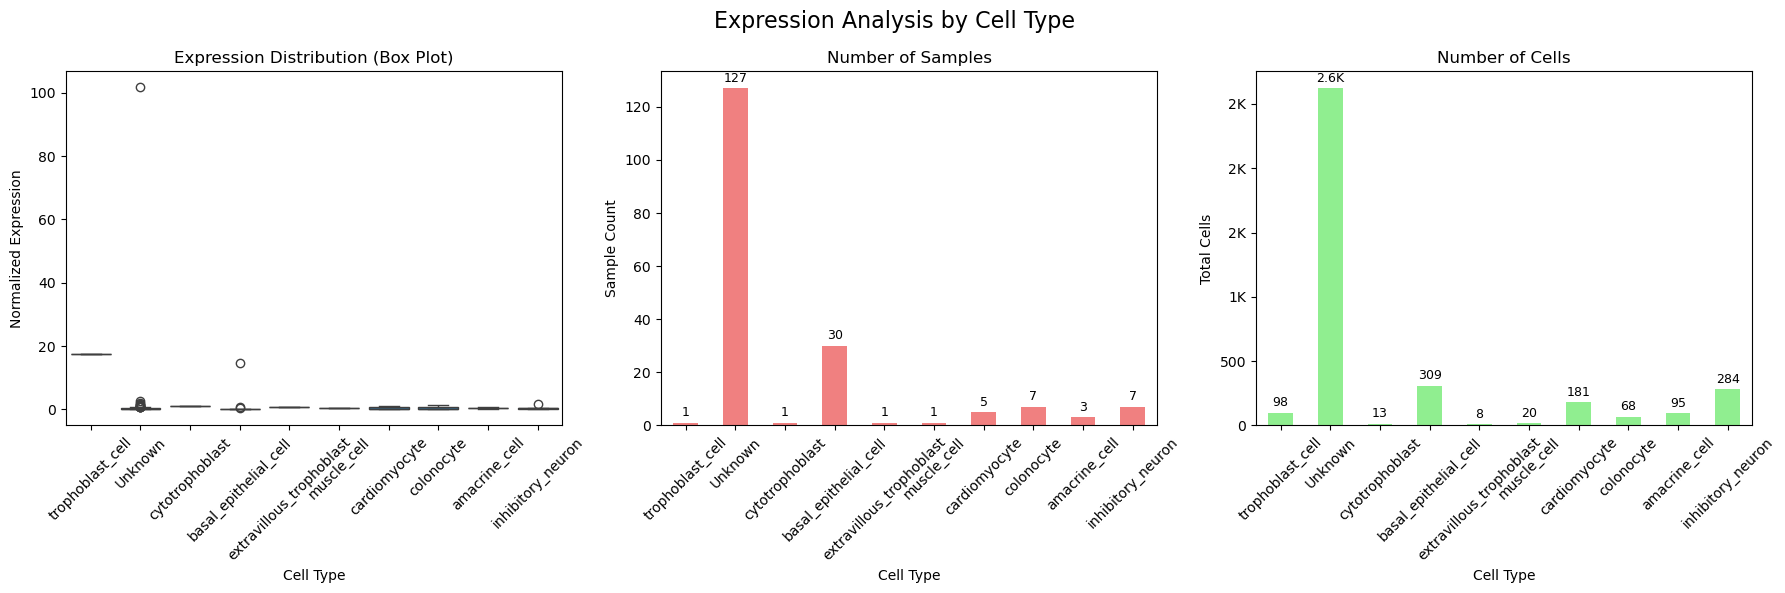

In [ ]:
fig = results.plot_expression_by("organ")

We can also get the sample UUIDs, so later we can get that specific sample and so some interesting things

In [ ]:
results.to_pandas()['uuid']

## 3. Correlation Analysis

Once you've identified samples or cell populations expressing your sequence of interest, Malva enables seamless transition to mechanistic analysis:

- **Sample retrieval**: Download complete expression profiles for positive samples
- **Feature projection**: Map Malva quantifications onto single-cell data
- **Differential analysis**: Compare positive vs. negative cell populations
- **Pathway enrichment**: Identify biological processes associated with your sequence

This workflow transforms sequence-level discoveries into testable biological hypotheses, completing the loop from unbiased discovery to mechanistic understanding.

### 3.1 Quantifying  a feature across the Malva Index

Again, we create a query for the RNA sequence in the file

In [ ]:
with dnaio.open("rna.fa") as f_in:
    for s in f_in:
        seq = s.sequence
        break

results = client.search_cells(seq)

In [ ]:
results.enrich_with_metadata()['uuid'].unique()

Now we take a look at the summary and pick one of the top samples that might be interesting, in this case, we can take one of the positive samples.

In [ ]:
sample = client.download_sample("608544f7-248f-4c66-8d59-20432a7e78a0")

# we remove the raw data so we show the DE in normalised counts
del sample.raw

In [ ]:
sample

In [ ]:
import scanpy as sc

In [ ]:
sc.pl.umap(sample, color=['cell_type_llm'])

In [ ]:
# we combine the cells with the sample metadata as usual

df_cells = results.enrich_with_metadata()

# we select the specific sample
df_cells = df_cells[df_cells['uuid'] == '608544f7-248f-4c66-8d59-20432a7e78a0']
df_cells.index = df_cells['cell_id'].astype(str)

# we assign to the sample cells
import numpy as np
sample.obs['covid_malva'] = np.log1p(df_cells['expression'])

In [ ]:
sc.pl.umap(sample, color=['cell_type_llm', 'covid_malva'])

In [ ]:
sc.pl.dotplot(sample, ['covid_malva'], groupby='cell_type_llm')

In [ ]:
from malva_client.tools import score_correlated_features

thr, pos, neg = score_correlated_features(
    sample,
    feature_key="covid_malva",
    method="gmm",
    gmm_components=2,
    n_markers=5,
    significance=0.05,
    show=True,
    smooth_alpha=0.5,
    smooth_iterations=10,
    smooth_neighbors=True
)

thr, pos, neg = score_correlated_features(
    sample,
    feature_key="covid_malva",
    method="gmm",
    gmm_components=2,
    n_markers=50,
    significance=0.01,
    show=False,
    smooth_alpha=0.5,
    smooth_iterations=10,
    smooth_neighbors=True
)

In [ ]:
from malva_client.tools import run_go_enrichment

res = run_go_enrichment(
    pos,
    organism = "hsapiens",
    significance = 0.05,
    top_n = 10,
    plot = True
)